<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit7/YangChau_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-eyvuerco
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-eyvuerco
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=0bcbba1ce32571c77a2c5b140eef583ec84a50590e5e543d993d0babcf740790
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_ypo6dy/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.6 MB/s eta 0:00:00
   ━

In [3]:

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Using a polynomial element in a model you build can benefit your accuracy greatly with the drawback being that your potential to overfit becomes much more likely. There are however specific models where this increased potential to overfit is almost beneficial. These models tend to handle a very finite or limited area of area, like the bike model in excersizes.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

There are a few scenarios where its worse to use a polynomial model. The first is where it does not fit the data any better than a linear model. In this case, there is no point in using a more complex model, especially when complex models tend to have other drawbacks that more simply models don't have to deal with. There is also an issue of overfitting, which becomes more likely in polynomial models, and is an especially relevant problem when asking models to predict beyond the observed data.

**Task3**:

What's the point of using b splines?

A b-spline allows for one to keep the benefits of using polynomial regression with reduced risk for overfitting. B-splines work by indicing input data into intervals known as knots. These knots do no necessarily have equal length nor are they equally spaced. The b-spline will then use polynomial regression on each of the knots but has the additional condition of assigning weights to each of the intervals as well. Essentially, a b-spline is a very very complex piecewise function.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

Where most models might give a range of points that could be your solution the gaussian process gives a range of functions that might fit your data. This allows GP to not only fit future observed data but also allows it to assign values of confidence to each of its predicted points via its confidence in function that generated that point.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [4]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [5]:
model_poly = bmb.Model("height ~ poly(weight, degree=4)", howell)
idata_poly = model_poly.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


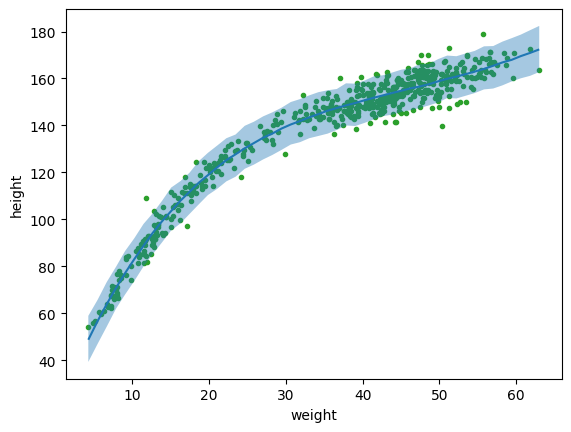

In [6]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that specific things like mean have a very heavy bearing on the final function and how it might relate to reality. In the article, they talk about how one of their first GPs had a mean of 0, which means that it will eventually converge to 0 to account for that setting. But this obviously brings up the question of how true to reality that is. Humanity will never not be realeasing CO2, so the fact that this model will converge to 0 is a bit problematic.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

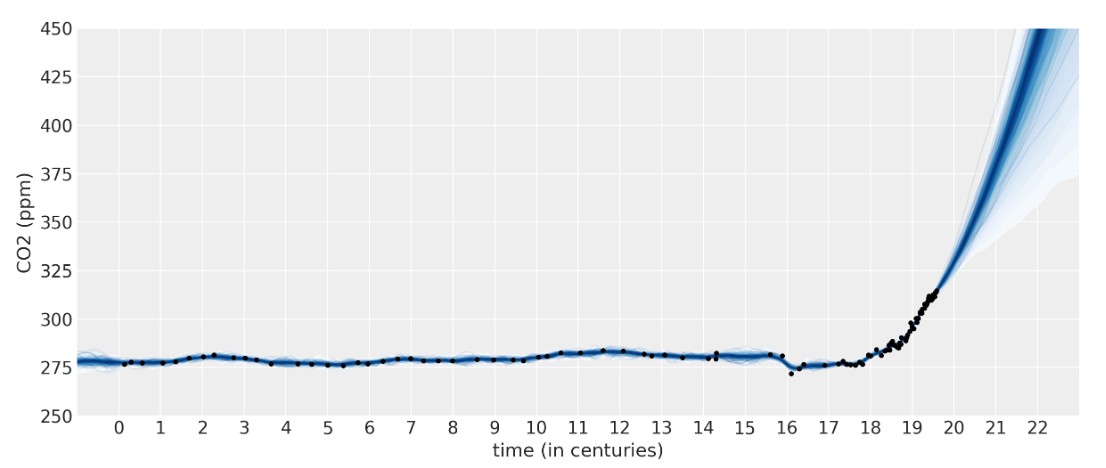

This one is my favorite because it was noted as a marked improvement over the graph I discussed in question 6. The authors of the article note that by combining a second degree polynomial with an expquad allowed the model to become a lot more flexible and realistic. They explained that it not only looked more realistic but also had the potential to decrease and increase, allowing it to account for a multitude of possible realities.